# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.91'

In [115]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [116]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym50,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model
0,FG19-101-A-start,105.218356,0.013298,1281.886424,0.011106,255.479679,1281.886424,726.551756,0.905233,3.349911,...,1.146000,1.131169,0.264328,0.007087,1.079523,1.037333,0.138200,0.003628,PseudoVoigtModel,PseudoVoigtModel
1,FG04-A1-1-start,104.372825,0.014477,1283.558354,0.012932,203.003436,1283.558354,616.055736,1.126290,2.766476,...,1.090202,1.087640,0.203188,0.011096,1.088795,1.110439,0.146282,0.003837,PseudoVoigtModel,PseudoVoigtModel
2,FG04-A1-2-start,104.065782,0.019577,1284.174925,0.018056,159.054332,1284.174925,555.819053,1.392810,2.759040,...,1.158291,1.099718,0.440940,0.017514,1.018149,1.058743,0.033305,0.004975,PseudoVoigtModel,PseudoVoigtModel
3,FG04-A1-4-start,104.528950,0.013380,1283.169508,0.011887,280.693327,1283.169508,806.663028,0.989463,4.189850,...,1.158470,1.078979,0.313600,0.007050,1.006036,1.002782,0.010029,0.002966,PseudoVoigtModel,PseudoVoigtModel
4,FG04-A1-16-start,104.130071,0.009164,1284.075040,0.008752,289.477267,1284.075040,878.351415,1.113304,3.184654,...,1.052469,1.038251,0.116828,0.007692,1.026749,1.075301,0.043598,0.002663,PseudoVoigtModel,PseudoVoigtModel


## First, get the metadata for this day

In [117]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'Cap','window'],
 sort=True)
diad_meta[0]

'004 FG19-101-A-start.txt'

## Now get all the important information out of the metadata files

In [118]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

  0%|          | 0/168 [00:00<?, ?it/s]

100%|██████████| 168/168 [00:00<00:00, 719.12it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG19-101-A-start.txt,"June 5, 2024\n",June,5.0,6.039,45.0,5.0,50.0,"['0h', '3m', '46s']",11:00:30 AM\n,39630.0,1324.964
1,FG04-A1-1-start.txt,"June 5, 2024\n",June,5.0,6.031,45.0,5.0,50.0,"['0h', '3m', '46s']",11:05:24 AM\n,39924.0,1324.964
2,FG04-A1-2-start.txt,"June 5, 2024\n",June,5.0,6.068,45.0,5.0,50.0,"['0h', '3m', '46s']",11:09:33 AM\n,40173.0,1324.964
3,FG04-A1-4-start.txt,"June 5, 2024\n",June,5.0,6.134,45.0,5.0,50.0,"['0h', '3m', '46s']",11:14:37 AM\n,40477.0,1324.964
4,FG04-A1-16-start.txt,"June 5, 2024\n",June,5.0,6.179,45.0,5.0,50.0,"['0h', '3m', '46s']",11:20:19 AM\n,40819.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [119]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG19-101-A-start'

## Now get filename from spectra into same form as metadata

In [120]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
FG19-101-A-start


In [121]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG19-101-A-start,105.218356,0.013298,1281.886424,0.011106,255.479679,1281.886424,726.551756,0.905233,3.349911,...,June,5.0,6.039,45.0,5.0,50.0,"['0h', '3m', '46s']",11:00:30 AM\n,39630.0,1324.964
1,FG04-A1-1-start,104.372825,0.014477,1283.558354,0.012932,203.003436,1283.558354,616.055736,1.126290,2.766476,...,June,5.0,6.031,45.0,5.0,50.0,"['0h', '3m', '46s']",11:05:24 AM\n,39924.0,1324.964
2,FG04-A1-2-start,104.065782,0.019577,1284.174925,0.018056,159.054332,1284.174925,555.819053,1.392810,2.759040,...,June,5.0,6.068,45.0,5.0,50.0,"['0h', '3m', '46s']",11:09:33 AM\n,40173.0,1324.964
3,FG04-A1-4-start,104.528950,0.013380,1283.169508,0.011887,280.693327,1283.169508,806.663028,0.989463,4.189850,...,June,5.0,6.134,45.0,5.0,50.0,"['0h', '3m', '46s']",11:14:37 AM\n,40477.0,1324.964
4,FG04-A1-16-start,104.130071,0.009164,1284.075040,0.008752,289.477267,1284.075040,878.351415,1.113304,3.184654,...,June,5.0,6.179,45.0,5.0,50.0,"['0h', '3m', '46s']",11:20:19 AM\n,40819.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [122]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [123]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [124]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

9.318840906425966e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,FG19-101-A-start,0.951308,0.004426,0.004129,0.001593,105.009372,0.013310,0.001004,0.013298,6.039,...,NaN,NaN,NaN,NaN,NaN,NaN,39630.0,0.998014,0.998004,0.998023
1,FG04-A1-1-start,0.609630,0.007472,0.007085,0.002372,104.165317,0.014482,0.000993,0.014477,6.031,...,NaN,NaN,NaN,NaN,NaN,NaN,39924.0,0.998012,0.998002,0.998021
2,FG04-A1-2-start,0.464893,0.009226,0.008921,0.002352,103.858713,0.019563,0.000988,0.019577,6.068,...,2548.197431,153.500028,Spline,1.734816,NaN,NaN,40173.0,0.998010,0.998001,0.998020
3,FG04-A1-4-start,0.687158,0.007217,0.006810,0.002390,104.320752,0.013390,0.000991,0.013380,6.134,...,NaN,NaN,NaN,NaN,NaN,NaN,40477.0,0.998008,0.997999,0.998018
4,FG04-A1-16-start,0.494153,0.004861,0.004253,0.002355,103.922437,0.009199,0.000984,0.009164,6.179,...,NaN,NaN,NaN,NaN,NaN,NaN,40819.0,0.998006,0.997997,0.998015


In [125]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

9.318840906425966e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,FG19-101-A-start,0.951308,0.004426,0.004129,0.001593,105.009372,0.013310,0.001004,0.013298,6.039,...,NaN,NaN,NaN,NaN,NaN,NaN,39630.0,0.998014,0.998004,0.998023
1,FG04-A1-1-start,0.609630,0.007472,0.007085,0.002372,104.165317,0.014482,0.000993,0.014477,6.031,...,NaN,NaN,NaN,NaN,NaN,NaN,39924.0,0.998012,0.998002,0.998021
2,FG04-A1-2-start,0.464893,0.009226,0.008921,0.002352,103.858713,0.019563,0.000988,0.019577,6.068,...,2548.197431,153.500028,Spline,1.734816,NaN,NaN,40173.0,0.998010,0.998001,0.998020
3,FG04-A1-4-start,0.687158,0.007217,0.006810,0.002390,104.320752,0.013390,0.000991,0.013380,6.134,...,NaN,NaN,NaN,NaN,NaN,NaN,40477.0,0.998008,0.997999,0.998018
4,FG04-A1-16-start,0.494153,0.004861,0.004253,0.002355,103.922437,0.009199,0.000984,0.009164,6.179,...,NaN,NaN,NaN,NaN,NaN,NaN,40819.0,0.998006,0.997997,0.998015


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [126]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_June 5, 2024_fitted_2024-06-05.xlsx


In [127]:
df_1974=sorted_df[sorted_df['filename'].str.contains('KL09')]
sorted_df=sorted_df[sorted_df['filename'].str.contains('K24')]

In [128]:
sorted_df

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
60,K24_1_FIA,0.105971,0.003905,0.000859,0.003810,103.017697,0.002167,0.000938,0.001958,11.876,...,NaN,NaN,NaN,NaN,0.149808,0.060793,48534.0,0.997962,0.997953,0.997971
14,K24_1_FIB,0.117979,0.003973,0.001076,0.003825,103.048001,0.002715,0.000938,0.002553,11.868,...,NaN,NaN,NaN,NaN,0.173931,0.069898,48884.0,0.997961,0.997951,0.997970
15,K24_1_FIC,0.106485,0.003962,0.001087,0.003810,103.018993,0.002744,0.000937,0.002584,11.862,...,NaN,NaN,NaN,NaN,0.026929,0.011501,49192.0,0.997959,0.997950,0.997968
16,K24_1_FID,0.115208,0.004004,0.001197,0.003820,103.041008,0.003021,0.000936,0.002879,11.861,...,NaN,NaN,NaN,NaN,NaN,NaN,49441.0,0.997958,0.997949,0.997967
17,K24_4_FIA,0.094140,0.004292,0.001991,0.003802,102.987839,0.005024,0.000935,0.004947,11.840,...,NaN,NaN,NaN,NaN,NaN,NaN,50159.0,0.997954,0.997945,0.997964
18,K24_4_FIB,0.101208,0.004038,0.001351,0.003806,103.005676,0.003410,0.000934,0.003286,11.839,...,NaN,NaN,NaN,NaN,NaN,NaN,50558.0,0.997953,0.997944,0.997962
19,K24_4_FIC,0.112088,0.004558,0.002492,0.003816,103.033134,0.006290,0.000934,0.006233,11.829,...,NaN,NaN,NaN,NaN,NaN,NaN,50830.0,0.997951,0.997942,0.997960
20,K24_4_FID,0.095520,0.012022,0.011405,0.003803,102.991321,0.028783,0.000933,0.028827,11.828,...,NaN,NaN,NaN,NaN,NaN,NaN,51318.0,0.997949,0.997940,0.997958
21,K24_4_FIE,0.098938,0.006062,0.004719,0.003804,102.999948,0.011911,0.000933,0.011898,11.822,...,NaN,NaN,NaN,NaN,NaN,NaN,51566.0,0.997948,0.997939,0.997957
22,K24_2_FIA,0.143053,0.004090,0.001298,0.003879,103.111281,0.003275,0.000934,0.003145,11.813,...,NaN,NaN,NaN,NaN,NaN,NaN,52599.0,0.997944,0.997935,0.997953


## This helps visualize the errors on each spectra 

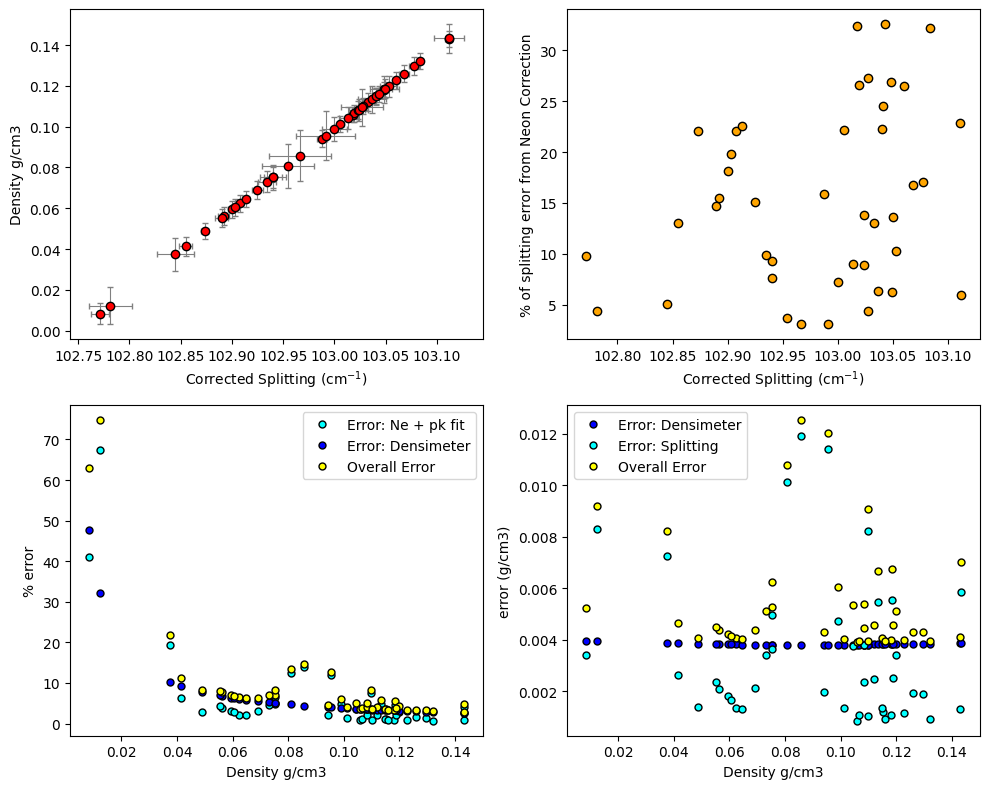

In [129]:
df=sorted_df
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=df.loc[df['Density g/cm3']>0]
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

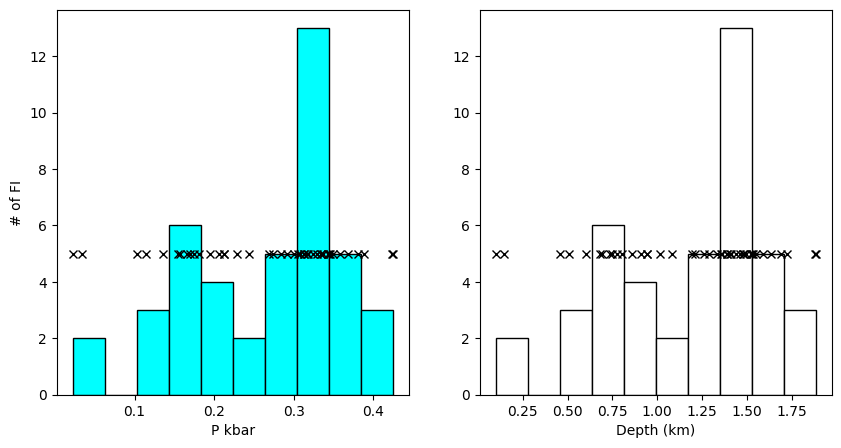

In [130]:
# Calculate pressure with a temperature estimate


Temp_C=1150
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')